In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# read data 
activity_data = pd.read_excel(r'C:\Users\Mahmoud Khattab\Downloads\NOON_Academy_task\Business_Analyst_-_Assignment.xlsx',
                              sheet_name='Activity Log (Sep 1 - Oct 13)')

students_data = pd.read_excel(r'C:\Users\Mahmoud Khattab\Downloads\NOON_Academy_task\Business_Analyst_-_Assignment.xlsx',
                              sheet_name='Students')

teachers_data = pd.read_excel(r'C:\Users\Mahmoud Khattab\Downloads\NOON_Academy_task\Business_Analyst_-_Assignment.xlsx',
                              sheet_name='Teachers')

In [4]:
activity_data.head()

,students,activity_type,date,group_id,teacher_id
0,2679779,attend_session,2019-10-05,953,240904
1,1502728,attend_session,2019-09-16,1287,364849
2,2676850,attend_session,2019-10-03,2520,364849
3,2676850,attend_session,2019-10-03,2520,364849
4,2679779,attend_session,2019-10-05,2520,364849


In [5]:
len(activity_data.date.unique())


43

In [6]:
students_data.head()

,student,school_id,grade,signup_date
0,114565,19231,11.0,2014-12-12
1,329492,41980,NaN,2015-11-16
2,478295,19231,12.0,2016-06-30
3,493803,41980,12.0,2016-08-21
4,560168,19231,10.0,2016-10-23


In [7]:
teachers_data.head()

,teacher_id,school_id
0,240904,42614.0
1,329492,41980.0
2,436016,NaN
3,885779,NaN
4,886982,23218.0


In [8]:
df1 = pd.merge(activity_data, students_data, left_on= 'students', right_on = 'student')
df1.head()

,students,activity_type,date,group_id,teacher_id,student,school_id,grade,signup_date
0,2679779,attend_session,2019-10-05,953,240904,2679779,374,12.0,2019-10-01
1,2679779,attend_session,2019-10-05,2520,364849,2679779,374,12.0,2019-10-01
2,2679779,attend_session,2019-10-06,2520,364849,2679779,374,12.0,2019-10-01
3,2679779,attend_session,2019-10-07,2520,364849,2679779,374,12.0,2019-10-01
4,2679779,attend_session,2019-10-07,2520,364849,2679779,374,12.0,2019-10-01


In [9]:
# creating a copy of data for the forecasting 
df2 = pd.merge(df1, teachers_data, left_on= 'teacher_id', right_on = 'teacher_id')
df2.head()

,students,activity_type,date,group_id,teacher_id,student,school_id_x,grade,signup_date,school_id_y
0,2679779,attend_session,2019-10-05,953,240904,2679779,374,12.0,2019-10-01,42614.0
1,1521885,join_group,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
2,1521885,join_group,2019-10-05,482,240904,1521885,10178,11.0,2018-03-21,42614.0
3,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
4,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0


In [10]:
# creating a third copy of the data to edit on them and export them for visualization
df3 = pd.merge(df1, teachers_data, left_on= 'teacher_id', right_on = 'teacher_id')
df3.head()

,students,activity_type,date,group_id,teacher_id,student,school_id_x,grade,signup_date,school_id_y
0,2679779,attend_session,2019-10-05,953,240904,2679779,374,12.0,2019-10-01,42614.0
1,1521885,join_group,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
2,1521885,join_group,2019-10-05,482,240904,1521885,10178,11.0,2018-03-21,42614.0
3,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
4,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0


In [11]:
len(df3.date.unique())

43

In [12]:
len(df2.date.unique())

43

In [13]:
df2 = df2[["students", "date"]]
df2.head()

,students,date
0,2679779,2019-10-05
1,1521885,2019-10-05
2,1521885,2019-10-05
3,1521885,2019-10-05
4,1521885,2019-10-05


In [14]:
df2 = df2.groupby("date").count()

In [15]:
df2.head()

,students
date,
2019-09-01,19
2019-09-02,26
2019-09-03,35
2019-09-04,20
2019-09-05,17


In [16]:
len(df2)

43

In [17]:
df2.to_csv("time_series_data", index= None)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2019-09-01 to 2019-10-13
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   students  43 non-null     int64
dtypes: int64(1)
memory usage: 688.0 bytes


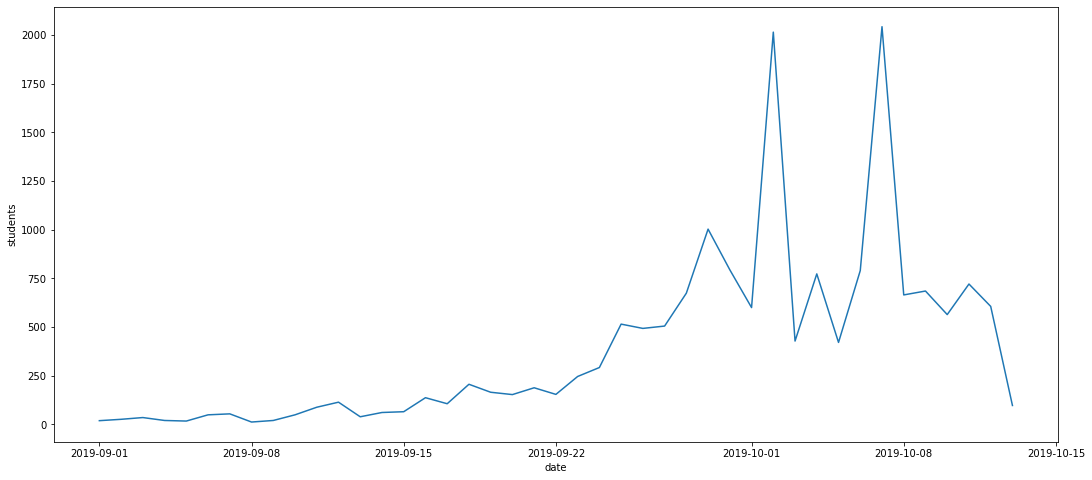

In [19]:
import seaborn as sns 

plt.figure(figsize= (18,8))
sns.lineplot(data = df2,x= df2.index ,y =df2.students);

In [20]:
df2["movingAverage"] = df2["students"].rolling(5).mean()
df2.head()

,students,movingAverage
date,,
2019-09-01,19,NaN
2019-09-02,26,NaN
2019-09-03,35,NaN
2019-09-04,20,NaN
2019-09-05,17,23.4


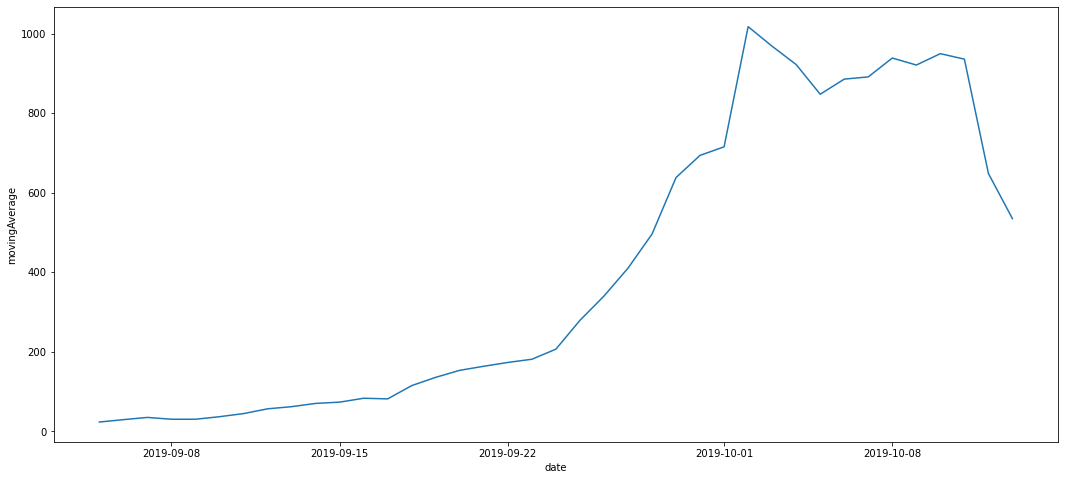

In [21]:
plt.figure(figsize= (18,8))
sns.lineplot(data = df2,x= df2.index ,y =df2.movingAverage);

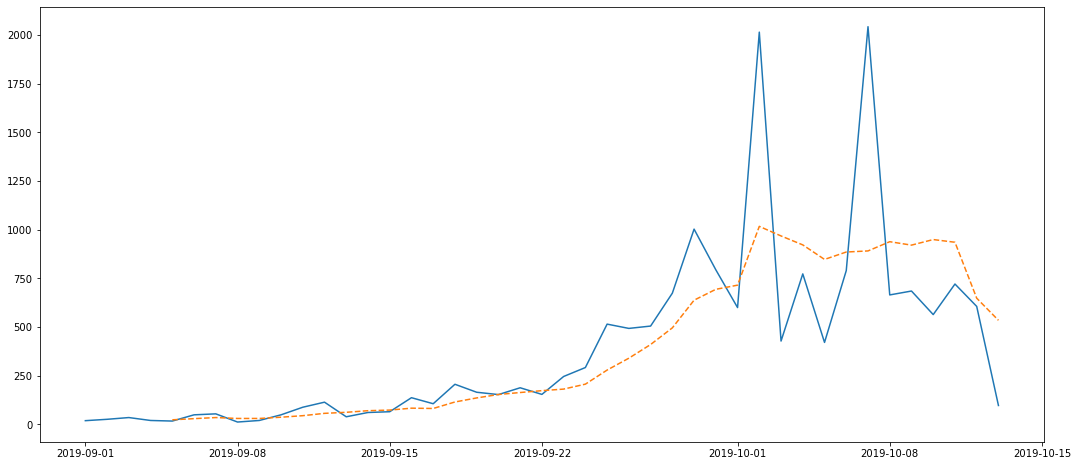

In [22]:
plt.figure(figsize= (18,8))
plt.plot(df2.index ,df2.students, label = "students number", linestyle="-");
plt.plot(df2.index ,df2.movingAverage, label = "moving average", linestyle="--");

In [23]:
# installing fbprophet 
#!pip install fbprophet

In [24]:
# Editing data cols names
df2.reset_index(inplace=True)
del(df2["movingAverage"])

df2.head()

,date,students
0,2019-09-01,19
1,2019-09-02,26
2,2019-09-03,35
3,2019-09-04,20
4,2019-09-05,17


In [25]:
df2.columns = ['ds', 'y']

In [26]:
df2.head()

,ds,y
0,2019-09-01,19
1,2019-09-02,26
2,2019-09-03,35
3,2019-09-04,20
4,2019-09-05,17


In [27]:
from fbprophet import Prophet

In [28]:
m = Prophet()
m.fit(df2)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=10)
forcast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-01,-135.843743,-618.519582,193.873888,-135.843743,-135.843743,-84.752732,-84.752732,-84.752732,-84.752732,-84.752732,-84.752732,0.0,0.0,0.0,-220.596475
1,2019-09-02,-110.763754,-288.466002,529.339661,-110.763754,-110.763754,216.424865,216.424865,216.424865,216.424865,216.424865,216.424865,0.0,0.0,0.0,105.661110
2,2019-09-03,-85.683766,-560.960166,244.996697,-85.683766,-85.683766,-61.779614,-61.779614,-61.779614,-61.779614,-61.779614,-61.779614,0.0,0.0,0.0,-147.463380
3,2019-09-04,-60.603777,-268.867275,568.219240,-60.603777,-60.603777,210.165766,210.165766,210.165766,210.165766,210.165766,210.165766,0.0,0.0,0.0,149.561989
4,2019-09-05,-35.523789,-558.691673,240.815504,-35.523789,-35.523789,-106.199518,-106.199518,-106.199518,-106.199518,-106.199518,-106.199518,0.0,0.0,0.0,-141.723306
5,2019-09-06,-10.443800,-455.539868,350.723889,-10.443800,-10.443800,-54.742786,-54.742786,-54.742786,-54.742786,-54.742786,-54.742786,0.0,0.0,0.0,-65.186586
6,2019-09-07,14.636188,-511.085988,321.699439,14.636188,14.636188,-119.115982,-119.115982,-119.115982,-119.115982,-119.115982,-119.115982,0.0,0.0,0.0,-104.479793
7,2019-09-08,39.716177,-480.209828,372.060049,39.716177,39.716177,-84.752732,-84.752732,-84.752732,-84.752732,-84.752732,-84.752732,0.0,0.0,0.0,-45.036555
8,2019-09-09,64.796165,-161.541972,702.279204,64.796165,64.796165,216.424865,216.424865,216.424865,216.424865,216.424865,216.424865,0.0,0.0,0.0,281.221030
9,2019-09-10,89.876154,-421.579211,436.140768,89.876154,89.876154,-61.779614,-61.779614,-61.779614,-61.779614,-61.779614,-61.779614,0.0,0.0,0.0,28.096540


<Figure size 1296x576 with 0 Axes>

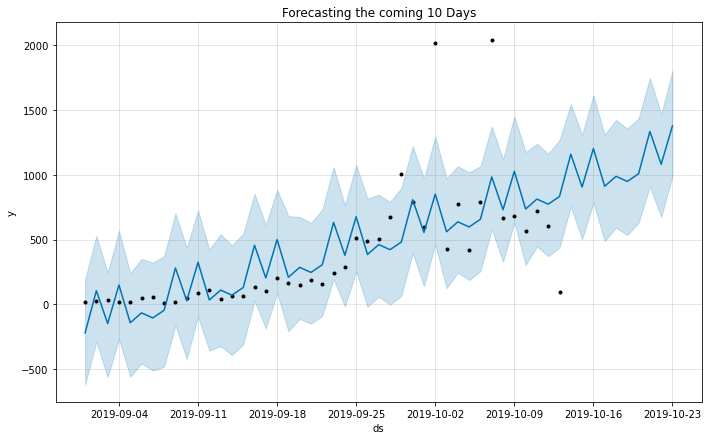

In [30]:
plt.figure(figsize= (18,8))
m.plot(forcast)
plt.title("Forecasting the coming 10 Days")
plt.savefig('forecasting_10_days.png')
plt.show()

In [31]:
df3

,students,activity_type,date,group_id,teacher_id,student,school_id_x,grade,signup_date,school_id_y
0,2679779,attend_session,2019-10-05,953,240904,2679779,374,12.0,2019-10-01,42614.0
1,1521885,join_group,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
2,1521885,join_group,2019-10-05,482,240904,1521885,10178,11.0,2018-03-21,42614.0
3,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
4,1521885,attend_session,2019-10-05,953,240904,1521885,10178,11.0,2018-03-21,42614.0
...,...,...,...,...,...,...,...,...,...,...
16702,2587667,attend_session,2019-09-13,1477,1898695,2587667,93951,9.0,2019-09-08,14904.0
16703,2587667,comment,2019-09-23,1477,1898695,2587667,93951,9.0,2019-09-08,14904.0
16704,2587667,attend_session,2019-09-24,1477,1898695,2587667,93951,9.0,2019-09-08,14904.0
16705,2587667,attend_session,2019-09-24,1477,1898695,2587667,93951,9.0,2019-09-08,14904.0


In [32]:
df3 = df3[["students", "activity_type", "date", "group_id", "teacher_id", "signup_date"]]
df3.head()

,students,activity_type,date,group_id,teacher_id,signup_date
0,2679779,attend_session,2019-10-05,953,240904,2019-10-01
1,1521885,join_group,2019-10-05,953,240904,2018-03-21
2,1521885,join_group,2019-10-05,482,240904,2018-03-21
3,1521885,attend_session,2019-10-05,953,240904,2018-03-21
4,1521885,attend_session,2019-10-05,953,240904,2018-03-21


In [33]:
df3['students_id'] = df3['students'].astype(str) + '-ST'
df3.head()

c:\Users\Mahmoud Khattab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,students,activity_type,date,group_id,teacher_id,signup_date,students_id
0,2679779,attend_session,2019-10-05,953,240904,2019-10-01,2679779-ST
1,1521885,join_group,2019-10-05,953,240904,2018-03-21,1521885-ST
2,1521885,join_group,2019-10-05,482,240904,2018-03-21,1521885-ST
3,1521885,attend_session,2019-10-05,953,240904,2018-03-21,1521885-ST
4,1521885,attend_session,2019-10-05,953,240904,2018-03-21,1521885-ST


In [34]:
df3.drop("students", axis = 1 , inplace= True)

C:\Users\Mahmoud Khattab\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df3.head()

,activity_type,date,group_id,teacher_id,signup_date,students_id
0,attend_session,2019-10-05,953,240904,2019-10-01,2679779-ST
1,join_group,2019-10-05,953,240904,2018-03-21,1521885-ST
2,join_group,2019-10-05,482,240904,2018-03-21,1521885-ST
3,attend_session,2019-10-05,953,240904,2018-03-21,1521885-ST
4,attend_session,2019-10-05,953,240904,2018-03-21,1521885-ST


In [36]:
df3['group_id'] = df3['group_id'].astype(str) + '-GRP'
df3['teacher_id'] = df3['teacher_id'].astype(str) + '-TCH'
df3

c:\Users\Mahmoud Khattab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Mahmoud Khattab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,activity_type,date,group_id,teacher_id,signup_date,students_id
0,attend_session,2019-10-05,953-GRP,240904-TCH,2019-10-01,2679779-ST
1,join_group,2019-10-05,953-GRP,240904-TCH,2018-03-21,1521885-ST
2,join_group,2019-10-05,482-GRP,240904-TCH,2018-03-21,1521885-ST
3,attend_session,2019-10-05,953-GRP,240904-TCH,2018-03-21,1521885-ST
4,attend_session,2019-10-05,953-GRP,240904-TCH,2018-03-21,1521885-ST
...,...,...,...,...,...,...
16702,attend_session,2019-09-13,1477-GRP,1898695-TCH,2019-09-08,2587667-ST
16703,comment,2019-09-23,1477-GRP,1898695-TCH,2019-09-08,2587667-ST
16704,attend_session,2019-09-24,1477-GRP,1898695-TCH,2019-09-08,2587667-ST
16705,attend_session,2019-09-24,1477-GRP,1898695-TCH,2019-09-08,2587667-ST


In [37]:
df3.to_csv("Noon_task_data", index = None)

In [ ]:
df2['group_id'].value_counts()

In [ ]:
df2['activity_type'].value_counts().plot()

attend_session    12104
homework           1810
comment            1595
join_group          934
post                264
Name: activity_type, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16707 entries, 0 to 16706
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   students       16707 non-null  int64         
 1   activity_type  16707 non-null  object        
 2   date           16707 non-null  datetime64[ns]
 3   group_id       16707 non-null  int64         
 4   teacher_id     16707 non-null  int64         
 5   student        16707 non-null  int64         
 6   grade          16539 non-null  float64       
 7   signup_date    16707 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [ ]:
df2['students'] = df2['students'].astype(str) + '-ST'
print(df2.head())


         students   activity_type       date  group_id  teacher_id  student  \
0      2679779-ST  attend_session 2019-10-01       953      240904  2679779   
1      1521885-ST      join_group 2019-10-01       953      240904  1521885   
2      1521885-ST      join_group 2019-10-01       482      240904  1521885   
3      1521885-ST  attend_session 2019-10-01       953      240904  1521885   
4      1521885-ST  attend_session 2019-10-01       953      240904  1521885   
...           ...             ...        ...       ...         ...      ...   
16702  2587667-ST  attend_session 2019-09-01      1477     1898695  2587667   
16703  2587667-ST         comment 2019-09-01      1477     1898695  2587667   
16704  2587667-ST  attend_session 2019-09-01      1477     1898695  2587667   
16705  2587667-ST  attend_session 2019-09-01      1477     1898695  2587667   
16706  2587667-ST  attend_session 2019-09-01      1477     1898695  2587667   

       grade signup_date      month  
0       12.0 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16707 entries, 0 to 16706
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   students       16707 non-null  object        
 1   activity_type  16707 non-null  object        
 2   date           16707 non-null  datetime64[ns]
 3   group_id       16707 non-null  int64         
 4   teacher_id     16707 non-null  int64         
 5   student        16707 non-null  int64         
 6   grade          16539 non-null  float64       
 7   signup_date    16707 non-null  datetime64[ns]
 8   month          16707 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 1.3+ MB


In [ ]:
del(df2['month'])

In [ ]:
df2.head()

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
0,2679779-ST,attend_session,2019-10-01,953,240904,2679779,12.0,2019-10-01
1,1521885-ST,join_group,2019-10-01,953,240904,1521885,11.0,2018-03-21
2,1521885-ST,join_group,2019-10-01,482,240904,1521885,11.0,2018-03-21
3,1521885-ST,attend_session,2019-10-01,953,240904,1521885,11.0,2018-03-21
4,1521885-ST,attend_session,2019-10-01,953,240904,1521885,11.0,2018-03-21


In [ ]:
df2.to_csv("new_data", index= None)

In [ ]:
activity_types = df2['activity_type'].unique()
activity_types

array(['attend_session', 'join_group', 'homework', 'comment', 'post'],
      dtype=object)

In [ ]:
attend_session = df2[df2["activity_type"] == "attend_session"]
attend_session

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
0,2679779-ST,attend_session,2019-10-01,953,240904,2679779,12.0,2019-10-01
3,1521885-ST,attend_session,2019-10-01,953,240904,1521885,11.0,2018-03-21
4,1521885-ST,attend_session,2019-10-01,953,240904,1521885,11.0,2018-03-21
6,2614219-ST,attend_session,2019-10-01,953,240904,2614219,11.0,2019-09-18
7,2648726-ST,attend_session,2019-10-01,953,240904,2648726,7.0,2019-09-28
...,...,...,...,...,...,...,...,...
16701,2587667-ST,attend_session,2019-09-01,1477,1898695,2587667,9.0,2019-09-08
16702,2587667-ST,attend_session,2019-09-01,1477,1898695,2587667,9.0,2019-09-08
16704,2587667-ST,attend_session,2019-09-01,1477,1898695,2587667,9.0,2019-09-08
16705,2587667-ST,attend_session,2019-09-01,1477,1898695,2587667,9.0,2019-09-08


In [ ]:
join_group = df2[df2["activity_type"] == "join_group"]
join_group

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
1,1521885-ST,join_group,2019-10-01,953,240904,1521885,11.0,2018-03-21
2,1521885-ST,join_group,2019-10-01,482,240904,1521885,11.0,2018-03-21
5,1355662-ST,join_group,2019-10-01,953,240904,1355662,12.0,2017-12-29
23,2602119-ST,join_group,2019-09-01,1287,364849,2602119,10.0,2019-09-15
29,2663279-ST,join_group,2019-09-01,1224,364849,2663279,8.0,2019-09-30
...,...,...,...,...,...,...,...,...
16685,2768691-ST,join_group,2019-10-01,2305,1659092,2768691,12.0,2019-10-10
16686,2768691-ST,join_group,2019-10-01,672,1669772,2768691,12.0,2019-10-10
16688,2768691-ST,join_group,2019-10-01,3165,2721975,2768691,12.0,2019-10-10
16689,2768691-ST,join_group,2019-10-01,3227,2748140,2768691,12.0,2019-10-10


In [ ]:
comment = df2[df2["activity_type"] == "comment"]
comment

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
83,1287796-ST,comment,2019-09-01,699,937409,1287796,10.0,2017-11-14
300,1843811-ST,comment,2019-10-01,103,974289,1843811,10.0,2019-01-28
301,1843811-ST,comment,2019-10-01,103,974289,1843811,10.0,2019-01-28
302,1843811-ST,comment,2019-10-01,103,974289,1843811,10.0,2019-01-28
406,2551563-ST,comment,2019-09-01,1110,1418671,2551563,11.0,2019-08-19
...,...,...,...,...,...,...,...,...
16661,2758507-ST,comment,2019-10-01,3338,2631191,2758507,10.0,2019-10-08
16662,2758507-ST,comment,2019-10-01,3338,2631191,2758507,10.0,2019-10-08
16663,2758507-ST,comment,2019-10-01,3338,2631191,2758507,10.0,2019-10-08
16673,2637654-ST,comment,2019-10-01,2998,2657815,2637654,10.0,2019-09-27


In [ ]:
homework = df2[df2["activity_type"] == "homework"]
homework

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
52,2585038-ST,homework,2019-09-01,1271,364849,2585038,11.0,2019-09-07
82,1287796-ST,homework,2019-09-01,699,937409,1287796,10.0,2017-11-14
84,1287796-ST,homework,2019-09-01,699,937409,1287796,10.0,2017-11-14
110,2220071-ST,homework,2019-10-01,699,937409,2220071,11.0,2019-04-18
124,1489353-ST,homework,2019-10-01,1174,937409,1489353,10.0,2018-03-18
...,...,...,...,...,...,...,...,...
16693,2585114-ST,homework,2019-09-01,1427,1810198,2585114,12.0,2019-09-07
16694,2585114-ST,homework,2019-09-01,1429,1810198,2585114,12.0,2019-09-07
16695,2585114-ST,homework,2019-09-01,1428,1810198,2585114,12.0,2019-09-07
16696,2585114-ST,homework,2019-09-01,1427,1810198,2585114,12.0,2019-09-07


In [ ]:
post = df2[df2["activity_type"] == "post"]
post

,students,activity_type,date,group_id,teacher_id,student,grade,signup_date
159,2622384-ST,post,2019-10-01,1174,937409,2622384,10.0,2019-09-21
186,2676850-ST,post,2019-10-01,49,947620,2676850,12.0,2019-10-01
295,2614852-ST,post,2019-09-01,794,974289,2614852,7.0,2019-09-18
299,1843811-ST,post,2019-10-01,103,974289,1843811,10.0,2019-01-28
320,2622384-ST,post,2019-09-01,103,974289,2622384,10.0,2019-09-21
...,...,...,...,...,...,...,...,...
16458,2757504-ST,post,2019-10-01,3339,2631191,2757504,10.0,2019-10-08
16461,2627973-ST,post,2019-10-01,3337,2631191,2627973,10.0,2019-09-24
16520,2758769-ST,post,2019-10-01,3338,2631191,2758769,10.0,2019-10-08
16664,2758507-ST,post,2019-10-01,3338,2631191,2758507,10.0,2019-10-08


In [ ]:
df2 = df2[["date", "students"]]
df2.head()

,date,students
0,2019-10-01,2679779-ST
1,2019-10-01,1521885-ST
2,2019-10-01,1521885-ST
3,2019-10-01,1521885-ST
4,2019-10-01,1521885-ST


In [ ]:
df2.groupby('date').count()

,students
date,
2019-09-01,6299
2019-10-01,10408


In [ ]:
df2.head()

,date,students
0,2019-10-01,2679779-ST
1,2019-10-01,1521885-ST
2,2019-10-01,1521885-ST
3,2019-10-01,1521885-ST
4,2019-10-01,1521885-ST
